<a href="https://colab.research.google.com/github/shaya-686/AI/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_NLTK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1
Проведіть токенизацію тексту:
 * Розділіть текст на речення
 * Кожне речення розділіть на слова. Результатом має бути `list[list]` де скажімо `data[5][10]` означає 10-те слово з 5-го речення(індексація з 0)
 * Видаліть пунктуацію та стоп-слова
 * Створіть список усіх слів з тексту 'words`

In [68]:
text = """Mrs Pig was very tired: 'Oh dear,' she said to her three little pigs, 'I can’t do this work anymore, I’m afraid you must leave home and make your own way in the world.' So the three little pigs set off.

The first little pig met a man carrying a bundle of straw.

'Excuse me,' said the first little pig politely. 'Would you please sell some of your straw so I can make a house?'

The man readily agreed and the first little pig went off to find a good place to build his house.

The other little pigs carried on along the road and, soon, they met a man carrying a bundle of sticks.

'Excuse me,' said the little pig politely. 'Would you please sell me some sticks so I can build a house?'

The man readily agreed and the little pig said goodbye to his brother.

The third little pig didn’t think much of their ideas:

'I’m going to build myself a much bigger, better, stronger house,' he thought, and he carried off down the road until he met a man with a cart load of bricks.

'Excuse me,' said the third little pig, as politely as his mother had taught him. 'Please can you sell me some bricks so I can build a house?'

'Of course,' said the man. 'Where would you like me to unload them?'

The third little pig looked around and saw a nice patch of ground under a tree.

'Over there,' he pointed.

They all set to work and by nighttime the house of straw and the house of sticks were built but the house of bricks was only just beginning to rise above the ground. The first and second little pigs laughed, they thought their brother was really silly having to work so hard when they had finished."""

In [1]:
import nltk

In [2]:
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [69]:
sentences = sent_tokenize(text)

In [70]:
len(sentences)

19

In [73]:
data = []
for sentence in sentences:
  words = word_tokenize(sentence)
  data.append(words)

In [12]:
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [78]:
import string

stop_words = set(stopwords.words("english"))
filtered_words = []

for sentence in data:
  sentence = [word for word in sentence if word not in string.punctuation]
  sentence = [word for word in sentence if word not in stop_words]
  filtered_words.append(sentence)

filtered_words[0]

['Mrs',
 'Pig',
 'tired',
 "'Oh",
 'dear',
 'said',
 'three',
 'little',
 'pigs',
 'I',
 '’',
 'work',
 'anymore',
 'I',
 '’',
 'afraid',
 'must',
 'leave',
 'home',
 'make',
 'way',
 'world']

In [81]:
words = []
for sentence in filtered_words:
  for word in sentence:
    words.append(word)

In [24]:
len(words)

182

# Завдання 2

 * Зробіть стемінг слів
 * Зробіть лематизацію слів
 * Створіть `pandas.DataFrame` зі словами, що мають різний результат при стемінгу та лематизації. Має бути 3 стовпчика:
  * оригінальне сово
  * результат стемінгу
  * результат лематизації


In [82]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [83]:
stemmed_words = [stemmer.stem(word) for word in words]

In [84]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [85]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [86]:
tags = nltk.pos_tag(words)

In [87]:
tags[0]

('Mrs', 'NNP')

In [97]:
def get_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'
    elif treebank_tag.startswith('V'):
        return 'v'
    elif treebank_tag.startswith('N'):
        return 'n'
    elif treebank_tag.startswith('R'):
        return 'r'
    else:
        return 'n'

lemmatized_words = []
for word, tag in tags:
    wn_tag = get_pos(tag)
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    lemmatized_words.append(lemma)

In [98]:
import pandas as pd
data = {
            'Original Word': words,
            'Stemmed Result': stemmed_words,
            'Lemmatized Result': lemmatized_words
        }
# Створення DataFrame
df = pd.DataFrame(data)
df = df[df['Stemmed Result'].str.lower()!=df['Lemmatized Result'].str.lower()]

In [99]:
df

,Original Word,Stemmed Result,Lemmatized Result
0,Mrs,mr,Mrs
5,said,said,say
7,little,littl,little
12,anymore,anymor,anymore
17,leave,leav,leave
...,...,...,...
163,built,built,build
164,house,hous,house
172,little,littl,little
177,really,realli,really


# Завдання 3
Виділіть фрази за такими шаблонами:
  * прикметник + іменник
  * (хоча б 1 прикметник) + іменник
  * (прислівник + дієслово) АБО (дієслово + прислівник)

In [42]:
!pip install -q svgling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 3.1 MB/s eta 0:00:00


In [55]:
tags = nltk.pos_tag(words)

In [100]:
len(words)

182

In [101]:
grammar = """
            FIRST_TEMP: {<JJ.*><NN.*>}
            SECOND_TEMP: {<JJ.*>+<NN.*>}
            THIRD_TEMP: {<RB.*><VB.*>|<VB.*><RB.*>}

"""

In [102]:
chunk_parser = nltk.RegexpParser(grammar)

tree = chunk_parser.parse(tags)

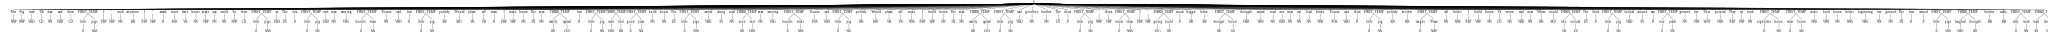

In [104]:
tree

In [106]:
def extract_phrases(tree):
    phrases = []
    for subtree in tree.subtrees():
        if subtree.label() in ['FIRST_TEMP', 'SECOND_TEMP', 'THIRD_TEMP']:
            phrase = ' '.join(word for word, tag in subtree.leaves())
            phrases.append((subtree.label(), phrase))
    return phrases


phrases = extract_phrases(tree)

print("Extracted Phrases:")
for label, phrase in phrases:
    print(f"{label}: {phrase}")

Extracted Phrases:
FIRST_TEMP: little pigs
FIRST_TEMP: little pigs
FIRST_TEMP: little pig
FIRST_TEMP: bundle straw
FIRST_TEMP: little pig
THIRD_TEMP: readily agreed
FIRST_TEMP: little pig
THIRD_TEMP: went find
FIRST_TEMP: good place
FIRST_TEMP: little pigs
THIRD_TEMP: soon met
FIRST_TEMP: bundle sticks
FIRST_TEMP: little pig
THIRD_TEMP: readily agreed
FIRST_TEMP: little pig
FIRST_TEMP: little pig
FIRST_TEMP: much ideas
THIRD_TEMP: going build
FIRST_TEMP: stronger house
FIRST_TEMP: little pig
FIRST_TEMP: taught 'Please
THIRD_TEMP: like unload
FIRST_TEMP: little pig
FIRST_TEMP: nice patch
FIRST_TEMP: nighttime house
FIRST_TEMP: straw house
FIRST_TEMP: little pigs
THIRD_TEMP: laughed thought
FIRST_TEMP: silly work
THIRD_TEMP: hard finished
